In [1]:
import pandas as pd
import itertools as it
import collections as c
import matplotlib.pyplot as plt
x = pd.read_csv("./results.csv")

In [3]:
words = []
for text in x.text:
    pv = str(text).replace(",", "")
    pv = pv.replace(".","")
    pv = pv.replace("–","")
    pv = pv.replace(" nan ","")
    words += pv.split()

#contar frequencia de palavras
repetidos = c.Counter(words)

mtt = 0 #palavras que ocorreram 1000 ou mais vezes
once = 0 #palavras que ocorreram apenas uma vez

for i in repetidos.keys():
    k = repetidos[i]
    if(k >=1000):
        mtt+=1
    
    if(k == 1) :
        once += 1

In [4]:
total_documents = len(x.index)
total_word_occurrences = len(words)
vocabulary_size = len(set(words))
words_occurring_1000_or_more_times = mtt
words_occurring_once = once

In [5]:
#tabela 4.1
tabela1 = pd.Series([total_documents,total_word_occurrences,vocabulary_size,words_occurring_1000_or_more_times,words_occurring_once], 
                    index=["Total documents", "Total word occurrences", "Vocabulary size", "Words_occurring > 1000 times", "Words occurring once"])
tabela1

Total documents                    249
Total word occurrences          213355
Vocabulary size                  30355
Words_occurring > 1000 times        23
Words occurring once             17875
dtype: int64

In [6]:
# preparando tabela 4.2

def aux3(a):
    return repetidos.get(a)

def aux4(a):
    return a/total_word_occurrences

def aux5(a):
    return a*probabilidade[a-1]

palavras = (sorted(repetidos.keys(), key=repetidos.get,reverse=True))
ocorrencias = [aux3(x) for x in palavras]
ranking = list(range(1,len(palavras)+1))
probabilidade = [aux4(y) for y in ocorrencias]
rp = [aux5(w) for w in ranking]

In [7]:
#tabela 4.2

df = pd.DataFrame({'Word' : (palavras[:50]),
                   'Freq' : (ocorrencias[:50]),
                   'r' : (ranking[:50]),
                   'Pr(%)': (probabilidade[:50]),
                    'r.Pr':(rp[:50])})
df

,Word,Freq,r,Pr(%),r.Pr
0,de,10116,1,0.047414,0.047414
1,que,6495,2,0.030442,0.060884
2,a,6478,3,0.030363,0.091088
3,o,5454,4,0.025563,0.102252
4,e,5374,5,0.025188,0.125940
5,do,3436,6,0.016105,0.096628
6,em,3069,7,0.014384,0.100691
7,da,2998,8,0.014052,0.112414
8,um,2550,9,0.011952,0.107567
9,para,2213,10,0.010372,0.103724


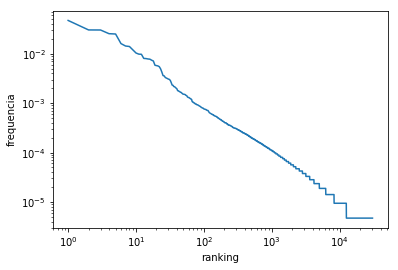

In [8]:
plt.plot((ranking),(probabilidade))
plt.ylabel('frequencia')
plt.xlabel("ranking")
plt.xscale("log")
plt.yscale("log")
plt.show()

In [9]:
def aux6(n):
    return (1/((n+1)*n))    
def aux7(n):
    return n/sum(qtdPalavras)

r1 =  sorted(repetidos.values())
r = c.Counter(r1)
nOcorrencias = sorted(r)
qtdPalavras = [r.get(x) for x in nOcorrencias]
pp = [aux6(x) for x in nOcorrencias]   #proporção prevista
pr = [aux7(x) for x in qtdPalavras]    #proporção real


dfa = pd.DataFrame({'Number of Ocurrencies (n)' : nOcorrencias ,
                   'Predict proportions' : pp,
                   'Actual proportion' : pr,
                   'Actual Number of the words': qtdPalavras})

dfa

,Number of Ocurrencies (n),Predict proportions,Actual proportion,Actual Number of the words
0,1,5.000000e-01,0.588865,17875
1,2,1.666667e-01,0.140076,4252
2,3,8.333333e-02,0.066513,2019
3,4,5.000000e-02,0.040092,1217
4,5,3.333333e-02,0.027211,826
5,6,2.380952e-02,0.018547,563
6,7,1.785714e-02,0.014495,440
7,8,1.388889e-02,0.011431,347
8,9,1.111111e-02,0.009455,287
9,10,9.090909e-03,0.009158,278
